In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import FancyArrow
import xlrd
import folium
from branca.colormap import LinearColormap

In [2]:
os.chdir("/Users/sunny/Library/CloudStorage/OneDrive-Personal/Documents/Python/Electoral maps project")

In [3]:
pwd

'/Users/sunny/Library/CloudStorage/OneDrive-Personal/Documents/Python/Electoral maps project'

**Load geographical data - India's constituencies**  

In [5]:
# Load in the India parliamentary constituencies shapefile
# NB a shapefile is really a group of files
# But you only need to specify the path to the .shp file, and gpd will load in the associated files
# as long as they are in the same folder
districts = gpd.read_file("maps-master/parliamentary-constituencies/india_pc_2019.shp")

In [6]:
# Some exploration of the India map file
districts

,ST_NAME,PC_NAME,ST_CODE,PC_CODE,Res,geometry
0,HIMACHAL PRADESH,KANGRA,02,1,GEN,"POLYGON ((76.57659 33.20606, 76.57785 33.20599..."
1,HIMACHAL PRADESH,MANDI,02,2,GEN,"POLYGON ((76.79468 33.25638, 76.79541 33.25622..."
2,HIMACHAL PRADESH,HAMIRPUR,02,3,GEN,"POLYGON ((76.02031 32.13977, 76.02143 32.13831..."
3,HIMACHAL PRADESH,SHIMLA (SC),02,4,SC,"POLYGON ((78.09421 31.41866, 78.09557 31.41853..."
4,PUNJAB,GURDASPUR,03,1,GEN,"POLYGON ((75.84332 32.50309, 75.84375 32.50236..."
...,...,...,...,...,...,...
538,JHARKHAND,LOHARDAGA (ST),20,12,ST,"POLYGON ((84.50551 23.67463, 84.50557 23.67462..."
539,JHARKHAND,PALAMU (SC),20,13,SC,"POLYGON ((84.02523 24.62864, 84.02643 24.62833..."
540,JHARKHAND,HAZARIBAGH,20,14,GEN,"POLYGON ((85.37836 24.55608, 85.37877 24.55558..."
541,JAMMU & KASHMIR,ANANTNAG,01,3,GEN,"POLYGON ((75.27526 34.24881, 75.27739 34.24867..."


In [7]:
districts['geometry'].describe()

count                                                   543
unique                                                  543
top       POLYGON ((76.5765871882482 33.20605549266691, ...
freq                                                      1
Name: geometry, dtype: object

In [8]:
districts = districts.drop(["ST_CODE", "PC_CODE"], axis=1)

In [9]:
districts.rename(columns = {'ST_NAME' : "State", 
                            'PC_NAME' : "Constituency", 
                            'Res' : "Reserved status"}, inplace=True)
districts

,State,Constituency,Reserved status,geometry
0,HIMACHAL PRADESH,KANGRA,GEN,"POLYGON ((76.57659 33.20606, 76.57785 33.20599..."
1,HIMACHAL PRADESH,MANDI,GEN,"POLYGON ((76.79468 33.25638, 76.79541 33.25622..."
2,HIMACHAL PRADESH,HAMIRPUR,GEN,"POLYGON ((76.02031 32.13977, 76.02143 32.13831..."
3,HIMACHAL PRADESH,SHIMLA (SC),SC,"POLYGON ((78.09421 31.41866, 78.09557 31.41853..."
4,PUNJAB,GURDASPUR,GEN,"POLYGON ((75.84332 32.50309, 75.84375 32.50236..."
...,...,...,...,...
538,JHARKHAND,LOHARDAGA (ST),ST,"POLYGON ((84.50551 23.67463, 84.50557 23.67462..."
539,JHARKHAND,PALAMU (SC),SC,"POLYGON ((84.02523 24.62864, 84.02643 24.62833..."
540,JHARKHAND,HAZARIBAGH,GEN,"POLYGON ((85.37836 24.55608, 85.37877 24.55558..."
541,JAMMU & KASHMIR,ANANTNAG,GEN,"POLYGON ((75.27526 34.24881, 75.27739 34.24867..."


In [10]:
districts = districts.sort_values(by = ["State", "Constituency"], ascending=True, ignore_index=True)

In [11]:
# Check that the reservation status in the Constituency column is consistent with the Reservation status column
sc_districts = districts[districts["Constituency"].str.contains(r"\(SC\)", na=False)]
st_districts = districts[districts["Constituency"].str.contains(r"\(ST\)", na=False)]

In [12]:
# Create a crosstab of 'Constituency' and 'Reserved status'
sc_crosstab_check = pd.crosstab(sc_districts["Constituency"], sc_districts["Reserved status"], margins=True, dropna=False)
st_crosstab_check = pd.crosstab(st_districts["Constituency"], st_districts["Reserved status"], margins=True, dropna=False)

In [13]:
print(sc_crosstab_check)  # One is Gen?

Reserved status     GEN  SC  All
Constituency                    
AGRA (SC)             0   1    1
AHMEDABAD WEST(SC)    0   1    1
ALATHUR (SC)          0   1    1
ALMORA (SC)           0   1    1
AMALAPURAM (SC)       0   1    1
...                 ...  ..  ...
TIRUVALLUR (SC)       0   1    1
UJJAIN (SC)           0   1    1
VILUPPURAM (SC)       0   1    1
WARANGAL(SC)          0   1    1
All                   1  83   84

[85 rows x 3 columns]


In [14]:
sc_districts[sc_districts["Reserved status"] == "GEN"]  # One Jalaun in UP. It is reserved: https://jalaun.nic.in/parliamentary-constituency/

,State,Constituency,Reserved status,geometry
457,UTTAR PRADESH,JALAUN (SC),GEN,"POLYGON ((79.13953 26.43470, 79.14086 26.43415..."


In [15]:
# Correct Jalaun
districts.loc[districts["Constituency"] == "JALAUN (SC)", "Reserved status"] = "SC"

In [16]:
print(st_crosstab_check)  # All ST

Reserved status           ST  All
Constituency                     
ADILABAD(ST)               1    1
ALIPURDUARS (ST)           1    1
ARAKU (ST)                 1    1
AUTONOMOUS DISTRICT (ST)   1    1
BANSWARA(ST)               1    1
BARDOLI (ST)               1    1
BASTAR (ST)                1    1
BELLARY (ST)               1    1
BETUL (ST)                 1    1
CHHOTA UDAIPUR(ST)         1    1
DAHOD (ST)                 1    1
DAUSA (ST)                 1    1
DHAR (ST)                  1    1
DINDORI (ST)               1    1
DUMKA (ST)                 1    1
GADCHIROLI-CHIMUR  (ST)    1    1
JHARGRAM (ST)              1    1
KANKER (ST)                1    1
KEONJHAR (ST)              1    1
KHARGONE(ST)               1    1
KHUNTI (ST)                1    1
KOKRAJHAR (ST)             1    1
KORAPUT (ST)               1    1
LOHARDAGA (ST)             1    1
MAHABUBABAD(ST)            1    1
MANDLA (ST)                1    1
MAYURBHANJ (ST)            1    1
MIZORAM (ST)  

In [17]:
# SC, ST, General verified
# For simplicity and merge-friendliness, remove these from the constituency name
# NB specify regex=True, otherwise the replacement will be interpreted literally!
districts["Constituency"] = districts["Constituency"].str.replace(r"\(.*", "", regex=True).str.strip()

In [18]:
districts

,State,Constituency,Reserved status,geometry
0,ANDAMAN & NICOBAR,ANDAMAN & NICOBAR,GEN,"MULTIPOLYGON (((93.02419 13.58841, 93.02482 13..."
1,ANDHRA PRADESH,AMALAPURAM,SC,"MULTIPOLYGON (((81.79186 16.92490, 81.79327 16..."
2,ANDHRA PRADESH,ANAKAPALLE,GEN,"POLYGON ((83.01993 18.11363, 83.02175 18.11361..."
3,ANDHRA PRADESH,ANANTAPUR,GEN,"POLYGON ((77.66529 15.23324, 77.66569 15.23295..."
4,ANDHRA PRADESH,ARAKU,ST,"POLYGON ((83.63763 19.15319, 83.63750 19.15295..."
...,...,...,...,...
538,WEST BENGAL,RAIGANJ,GEN,"POLYGON ((88.28875 26.35126, 88.28917 26.35076..."
539,WEST BENGAL,RANAGHAT,SC,"POLYGON ((88.48653 23.53932, 88.48834 23.53850..."
540,WEST BENGAL,SREERAMPUR,GEN,"POLYGON ((88.35380 22.85111, 88.35376 22.84670..."
541,WEST BENGAL,TAMLUK,GEN,"POLYGON ((87.84897 22.51125, 87.84935 22.51123..."


In [19]:
districts["State"].value_counts()

State
UTTAR PRADESH           80
MAHARASHTRA             48
WEST BENGAL             42
BIHAR                   40
TAMIL NADU              39
MADHYA PRADESH          29
KARNATAKA               28
GUJARAT                 26
ANDHRA PRADESH          25
RAJASTHAN               25
ORISSA                  21
KERALA                  20
TELANGANA               17
JHARKHAND               14
ASSAM                   14
PUNJAB                  13
CHHATTISGARH            11
HARYANA                 10
DELHI                    7
JAMMU & KASHMIR          6
UTTARAKHAND              5
HIMACHAL PRADESH         4
GOA                      2
TRIPURA                  2
MANIPUR                  2
MEGHALAYA                2
ARUNACHAL PRADESH        2
SIKKIM                   1
ANDAMAN & NICOBAR        1
PUDUCHERRY               1
NAGALAND                 1
MIZORAM                  1
DAMAN & DIU              1
DADRA & NAGAR HAVELI     1
CHANDIGARH               1
LAKSHADWEEP              1
Name: count, dtype: in

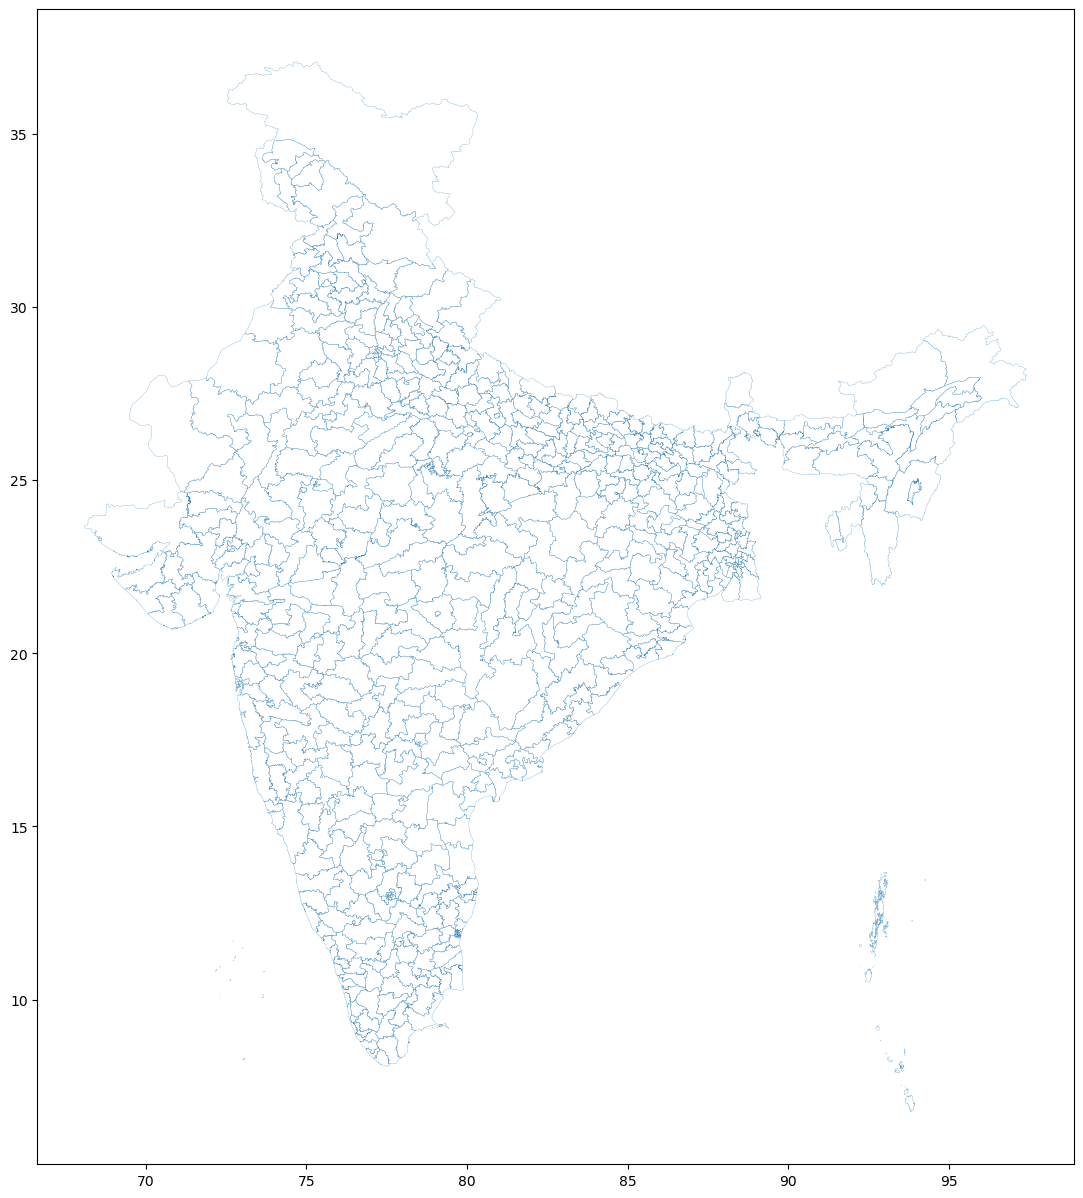

In [20]:
# Plot the map, check that it makes sense
fig, ax = plt.subplots(figsize=(15, 15))
districts.boundary.plot(ax=ax, linewidth=0.15)
plt.show()

**Load 2019 General Election data**  
***2019 statistical reports have been published, web scraping not required***

In [22]:
# Load in ECI election data
election_2019 = pd.read_excel("maps-master/ECI Data/33. Constituency Wise Detailed Result.xlsx", 
                              sheet_name="mySheet", 
                              usecols="A:N",
                              skiprows = 2,
                              nrows=8598)

In [23]:
# And load in a copy which won't be modified, for checks
election_2019_v2 = pd.read_excel("maps-master/ECI Data/33. Constituency Wise Detailed Result.xlsx", 
                              sheet_name="mySheet", 
                              usecols="A:N",
                              skiprows = 2,
                              nrows=8598)

In [24]:
election_2019

,State Name,PC NAME,CANDIDATES NAME,SEX,AGE,CATEGORY,PARTY NAME,PARTY SYMBOL,GENERAL,POSTAL,TOTAL,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,Total Electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,23.294530,31.356893,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1.231003,1.657060,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,38.733845,52.139840,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1.221564,1.644354,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,2.948427,3.968894,1451418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,FEMALE,57.0,GENERAL,IND,Slate,870,0,870,0.089377,0.110002,973410
8593,Puducherry,Puducherry,IMS. BALAJI,MALE,32.0,GENERAL,IND,Bat,2546,0,2546,0.261555,0.321914,973410
8594,Puducherry,Puducherry,RAMESH.D,MALE,49.0,SC,IND,Mike,1653,0,1653,0.169815,0.209004,973410
8595,Puducherry,Puducherry,V. RAMAMURTHI,MALE,74.0,GENERAL,IND,Whistle,641,1,642,0.065954,0.081174,973410


In [25]:
# Use the .columns attribute of the df, and apply a chain of string methods to reformat the column names
election_2019.columns = election_2019.columns.str.strip().str.title()
election_2019.columns

Index(['State Name', 'Pc Name', 'Candidates Name', 'Sex', 'Age', 'Category',
       'Party Name', 'Party Symbol', 'General', 'Postal', 'Total',
       'Over Total Electors In Constituency',
       'Over Total Votes Polled In Constituency', 'Total Electors'],
      dtype='object')

In [26]:
election_2019.rename(columns={"Pc Name" : "Constituency",
                              "State Name" : "State", 
                              "Candidates Name" : "Candidate", 
                              "Category" : "Candidate Category",
                              "Total" : "Votes",
                              "Over Total Electors In Constituency" : "Overall share", 
                              "Over Total Votes Polled In Constituency" : "Actual share"}, inplace=True)
election_2019.columns

Index(['State', 'Constituency', 'Candidate', 'Sex', 'Age',
       'Candidate Category', 'Party Name', 'Party Symbol', 'General', 'Postal',
       'Votes', 'Overall share', 'Actual share', 'Total Electors'],
      dtype='object')

In [27]:
election_2019

,State,Constituency,Candidate,Sex,Age,Candidate Category,Party Name,Party Symbol,General,Postal,Votes,Overall share,Actual share,Total Electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,23.294530,31.356893,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1.231003,1.657060,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,38.733845,52.139840,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1.221564,1.644354,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,2.948427,3.968894,1451418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,FEMALE,57.0,GENERAL,IND,Slate,870,0,870,0.089377,0.110002,973410
8593,Puducherry,Puducherry,IMS. BALAJI,MALE,32.0,GENERAL,IND,Bat,2546,0,2546,0.261555,0.321914,973410
8594,Puducherry,Puducherry,RAMESH.D,MALE,49.0,SC,IND,Mike,1653,0,1653,0.169815,0.209004,973410
8595,Puducherry,Puducherry,V. RAMAMURTHI,MALE,74.0,GENERAL,IND,Whistle,641,1,642,0.065954,0.081174,973410


In [28]:
assert (election_2019["General"] + election_2019["Postal"] == election_2019["Votes"]).all() # Correct sum

In [29]:
election_2019 = election_2019.drop(["General", "Postal", "Sex", "Age", "Party Symbol"], axis=1)

In [30]:
# Calculate total votes by PC and move this column
election_2019["Total votes"] = election_2019.groupby(["State","Constituency"])["Votes"].transform("sum")
column_position = election_2019.columns.get_loc("Votes") + 1
election_2019.insert(column_position, "Total votes", election_2019.pop("Total votes"))
election_2019

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Overall share,Actual share,Total Electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,ST,TDP,338101,1074538,23.294530,31.356893,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,ST,BJP,17867,1074538,1.231003,1.657060,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,ST,YSRCP,562190,1074538,38.733845,52.139840,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,ST,INC,17730,1074538,1.221564,1.644354,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,ST,JnP,42794,1074538,2.948427,3.968894,1451418
...,...,...,...,...,...,...,...,...,...,...
8592,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,GENERAL,IND,870,790760,0.089377,0.110002,973410
8593,Puducherry,Puducherry,IMS. BALAJI,GENERAL,IND,2546,790760,0.261555,0.321914,973410
8594,Puducherry,Puducherry,RAMESH.D,SC,IND,1653,790760,0.169815,0.209004,973410
8595,Puducherry,Puducherry,V. RAMAMURTHI,GENERAL,IND,642,790760,0.065954,0.081174,973410


In [31]:
# Re-calculate vote shares
election_2019["Vote share"] = (election_2019["Votes"] / election_2019["Total votes"]) * 100
election_2019

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Overall share,Actual share,Total Electors,Vote share
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,ST,TDP,338101,1074538,23.294530,31.356893,1451418,31.464778
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,ST,BJP,17867,1074538,1.231003,1.657060,1451418,1.662761
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,ST,YSRCP,562190,1074538,38.733845,52.139840,1451418,52.319229
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,ST,INC,17730,1074538,1.221564,1.644354,1451418,1.650011
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,ST,JnP,42794,1074538,2.948427,3.968894,1451418,3.982549
...,...,...,...,...,...,...,...,...,...,...,...
8592,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,GENERAL,IND,870,790760,0.089377,0.110002,973410,0.110021
8593,Puducherry,Puducherry,IMS. BALAJI,GENERAL,IND,2546,790760,0.261555,0.321914,973410,0.321969
8594,Puducherry,Puducherry,RAMESH.D,SC,IND,1653,790760,0.169815,0.209004,973410,0.209039
8595,Puducherry,Puducherry,V. RAMAMURTHI,GENERAL,IND,642,790760,0.065954,0.081174,973410,0.081188


In [32]:
election_2019["vote_share_diff"] = election_2019["Vote share"] - election_2019["Actual share"]
election_2019["vote_share_diff"].describe()

count    8597.000000
mean        0.005614
std         0.023907
min         0.000000
25%         0.000052
50%         0.000175
75%         0.000766
max         0.993081
Name: vote_share_diff, dtype: float64

In [33]:
abs(election_2019["vote_share_diff"]).describe()

count    8597.000000
mean        0.005614
std         0.023907
min         0.000000
25%         0.000052
50%         0.000175
75%         0.000766
max         0.993081
Name: vote_share_diff, dtype: float64

In [34]:
assert (election_2019["vote_share_diff"] >= 0).all()  # True

In [35]:
election_2019[election_2019["vote_share_diff"] <= 0.05]["Candidate"].count()  # 8344 rows

8344

In [36]:
election_2019[election_2019["vote_share_diff"] > 0.05]["Constituency"].count()  # 253 rows

253

In [37]:
election_2019["vote_share_diff"].sort_values(ascending=False).head(30)  

344     0.993081
7839    0.488113
7829    0.477947
282     0.377151
354     0.343274
11      0.275987
13      0.272552
1752    0.260722
1918    0.246284
4659    0.244238
3222    0.240818
7840    0.232354
1857    0.231197
7814    0.228563
4902    0.224107
345     0.224098
258     0.223133
1938    0.218591
4901    0.207415
283     0.193882
3238    0.193588
347     0.193166
7830    0.192611
352     0.187238
3195    0.183881
1921    0.183556
1827    0.183121
1446    0.180196
2       0.179390
259     0.177740
Name: vote_share_diff, dtype: float64

In [38]:
election_2019.sort_values(by = "vote_share_diff", ascending=False).head(25)

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Overall share,Actual share,Total Electors,Vote share,vote_share_diff
344,Arunachal Pradesh,ARUNACHAL WEST,KIREN RIJIJU,ST,BJP,225796,358310,48.686540,62.023860,463775,63.016941,0.993081
7839,Uttarakhand,Almora,Ajay Tamta,SC,BJP,444651,694472,33.237281,63.539090,1337808,64.027203,0.488113
7829,Uttarakhand,Garhwal,Tirath Singh Rawat,GENERAL,BJP,506980,742784,37.393531,67.776081,1355796,68.254028,0.477947
282,Andhra Pradesh,Kadapa,Y.S.Avinash Reddy,GENERAL,YSRCP,783499,1228242,49.893908,63.413128,1570330,63.790279,0.377151
354,Arunachal Pradesh,ARUNACHAL EAST,Tapir Gao,ST,BJP,153883,293781,45.287944,52.036900,339788,52.380174,0.343274
11,Andhra Pradesh,Srikakulam,KINJARAPU RAM MOHAN NAIDU,GENERAL,TDP,534544,1157329,34.401040,45.911743,1553860,46.187731,0.275987
13,Andhra Pradesh,Srikakulam,DUVVADA SRINIVAS,GENERAL,YSRCP,527891,1157329,33.972880,45.340320,1553860,45.612872,0.272552
1752,Haryana,Bhiwani-Mahendragarh,Dharambir Singh S/o Bhale Ram,GENERAL,BJP,736699,1161115,44.531913,63.186826,1654317,63.447548,0.260722
1918,Jammu & Kashmir,Ladakh,Jamyang Tsering Namgyal,ST,BJP,42914,126426,23.943269,33.697684,179232,33.943967,0.246284
4659,Rajasthan,Jhunjhunu,NARENDRA KUMAR,GENERAL,BJP,738163,1198927,38.091225,61.324398,1937882,61.568636,0.244238


In [39]:
# Not sure why ECI vote shares as wrong. Going to ignore the issue and use my calculated shares.

In [40]:
columns_to_drop = ["Overall share", "Actual share", "Total Electors", "vote_share_diff"]
election_2019 = election_2019.drop(columns=[col for col in columns_to_drop if col in election_2019.columns])

In [41]:
# Use lambda-apply to convert multiple cols to upper case at once
election_2019[["State", "Constituency"]] = election_2019[["State", "Constituency"]].apply(lambda x: x.str.strip().str.upper())

In [42]:
# Check reservation statuses
election_2019["Candidate Category"].value_counts(dropna = False)

Candidate Category
GENERAL    5317
SC         2110
ST          627
NaN         543
Name: count, dtype: int64

In [43]:
election_2019["Party Name"][election_2019["Candidate Category"].isna()].value_counts(dropna = False)

Party Name
NOTA    543
Name: count, dtype: int64

In [44]:
# For all NOTA votes, PC category is missing. Fill in
election_2019["Candidate Category"] = election_2019.groupby(["State", "Constituency"])["Candidate Category"].transform(lambda group: group.ffill()).infer_objects()
# need to edit because NOTA cannot be the first entry in a PC for this to work
# But it is on top in Vellore

In [45]:
election_2019.head(30)

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Vote share
0,ANDHRA PRADESH,ARUKU,KISHORE CHANDRA DEO,ST,TDP,338101,1074538,31.464778
1,ANDHRA PRADESH,ARUKU,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,ST,BJP,17867,1074538,1.662761
2,ANDHRA PRADESH,ARUKU,GODDETI. MADHAVI,ST,YSRCP,562190,1074538,52.319229
3,ANDHRA PRADESH,ARUKU,SHRUTI DEVI VYRICHERLA,ST,INC,17730,1074538,1.650011
4,ANDHRA PRADESH,ARUKU,GANGULAIAH VAMPURU.,ST,JnP,42794,1074538,3.982549
5,ANDHRA PRADESH,ARUKU,SWAMULA. SUBRAHMANYAM,ST,JAJGP,4710,1074538,0.438328
6,ANDHRA PRADESH,ARUKU,ANUMULA VAMSIKRISHNA,ST,IND,10240,1074538,0.952968
7,ANDHRA PRADESH,ARUKU,KANGALA BALUDORA,ST,IND,13826,1074538,1.286693
8,ANDHRA PRADESH,ARUKU,NARAVA SATYAVATHI,ST,IND,11236,1074538,1.045659
9,ANDHRA PRADESH,ARUKU,BIDDIKA RAMAYYA.,ST,IND,7867,1074538,0.732129


In [46]:
# Define function to determine Reservation status for each constituency
def determine_reservation_status(pc):
    pc["Reservation status"] = None
    if "GENERAL" in pc["Candidate Category"].values:
        pc["Reservation status"] = "GENERAL"
    elif all(pc["Candidate Category"] == "SC"):
        pc["Reservation status"] = "SC"
    elif all(pc["Candidate Category"] == "ST"):
        pc["Reservation status"] = "ST"
    return pc

In [47]:
# Apply the function
election_2019 = election_2019.groupby(["State", "Constituency"], group_keys=False).apply(determine_reservation_status, include_groups=True)

/var/folders/lf/vnbp5by93v73p5g3mjm8vs600000gn/T/ipykernel_68717/2727982189.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  election_2019 = election_2019.groupby(["State", "Constituency"], group_keys=False).apply(determine_reservation_status, include_groups=True)


In [48]:
election_2019.head(20)

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Vote share,Reservation status
0,ANDHRA PRADESH,ARUKU,KISHORE CHANDRA DEO,ST,TDP,338101,1074538,31.464778,ST
1,ANDHRA PRADESH,ARUKU,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,ST,BJP,17867,1074538,1.662761,ST
2,ANDHRA PRADESH,ARUKU,GODDETI. MADHAVI,ST,YSRCP,562190,1074538,52.319229,ST
3,ANDHRA PRADESH,ARUKU,SHRUTI DEVI VYRICHERLA,ST,INC,17730,1074538,1.650011,ST
4,ANDHRA PRADESH,ARUKU,GANGULAIAH VAMPURU.,ST,JnP,42794,1074538,3.982549,ST
5,ANDHRA PRADESH,ARUKU,SWAMULA. SUBRAHMANYAM,ST,JAJGP,4710,1074538,0.438328,ST
6,ANDHRA PRADESH,ARUKU,ANUMULA VAMSIKRISHNA,ST,IND,10240,1074538,0.952968,ST
7,ANDHRA PRADESH,ARUKU,KANGALA BALUDORA,ST,IND,13826,1074538,1.286693,ST
8,ANDHRA PRADESH,ARUKU,NARAVA SATYAVATHI,ST,IND,11236,1074538,1.045659,ST
9,ANDHRA PRADESH,ARUKU,BIDDIKA RAMAYYA.,ST,IND,7867,1074538,0.732129,ST


In [49]:
election_2019["Reservation status"].value_counts(dropna=False)

Reservation status
GENERAL    7019
SC         1070
ST          492
None         16
Name: count, dtype: int64

In [50]:
election_2019[election_2019["Reservation status"].isna()]  # Warangal, TG has one pesky ST. Check whether it is SC or ST

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Vote share,Reservation status
8275,TELANGANA,WARANGAL,CHINTHA SAMBAMURTHY,SC,BJP,83777,1061645,7.891244,None
8276,TELANGANA,WARANGAL,DAYAKAR PASUNOORI,SC,TRS,612498,1061645,57.693297,None
8277,TELANGANA,WARANGAL,DOMMATI SAMBAIAH,SC,INC,262200,1061645,24.697521,None
8278,TELANGANA,WARANGAL,BOLLAPALLY SARAIAH,SC,BSP,8193,1061645,0.771727,None
8279,TELANGANA,WARANGAL,KANNAM VENKANNA,SC,MCPI,5386,1061645,0.507326,None
8280,TELANGANA,WARANGAL,PANIGANTI RAJITHAVANI,SC,PPOI,1986,1061645,0.187068,None
8281,TELANGANA,WARANGAL,BUNGA JYOTHI RAMANA,SC,AHNP,29183,1061645,2.748847,None
8282,TELANGANA,WARANGAL,BOCHU KRUPAKAR,SC,HBP,1895,1061645,0.178497,None
8283,TELANGANA,WARANGAL,SURESH KANAKAM,SC,SMFB,1324,1061645,0.124712,None
8284,TELANGANA,WARANGAL,AITHA PRAVEEN KUMAR,ST,IND,2093,1061645,0.197147,None


In [51]:
districts[["Constituency", "Reserved status"]][districts["State"] == "TELANGANA"]  # Warangal is SC

,Constituency,Reserved status
397,ADILABAD,ST
398,BHONGIR,GEN
399,CHEVELLA,GEN
400,HYDERABAD,GEN
401,KARIMNAGAR,GEN
402,KHAMMAM,GEN
403,MAHABUBABAD,ST
404,MAHBUBNAGAR,GEN
405,MALKAJGIRI,GEN
406,MEDAK,GEN


In [52]:
# To replace values in columns based on conditions (i.e. replace the values in specific rows only), need to use df.loc
election_2019.loc[election_2019["Constituency"] == "WARANGAL", ["Candidate Category", "Reservation status"]] = "SC"

In [53]:
election_2019[election_2019["Reservation status"].isna()]  # None

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Vote share,Reservation status


In [54]:
election_2019[election_2019["Constituency"] == "WARANGAL"]  # All SC

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Vote share,Reservation status
8275,TELANGANA,WARANGAL,CHINTHA SAMBAMURTHY,SC,BJP,83777,1061645,7.891244,SC
8276,TELANGANA,WARANGAL,DAYAKAR PASUNOORI,SC,TRS,612498,1061645,57.693297,SC
8277,TELANGANA,WARANGAL,DOMMATI SAMBAIAH,SC,INC,262200,1061645,24.697521,SC
8278,TELANGANA,WARANGAL,BOLLAPALLY SARAIAH,SC,BSP,8193,1061645,0.771727,SC
8279,TELANGANA,WARANGAL,KANNAM VENKANNA,SC,MCPI,5386,1061645,0.507326,SC
8280,TELANGANA,WARANGAL,PANIGANTI RAJITHAVANI,SC,PPOI,1986,1061645,0.187068,SC
8281,TELANGANA,WARANGAL,BUNGA JYOTHI RAMANA,SC,AHNP,29183,1061645,2.748847,SC
8282,TELANGANA,WARANGAL,BOCHU KRUPAKAR,SC,HBP,1895,1061645,0.178497,SC
8283,TELANGANA,WARANGAL,SURESH KANAKAM,SC,SMFB,1324,1061645,0.124712,SC
8284,TELANGANA,WARANGAL,AITHA PRAVEEN KUMAR,SC,IND,2093,1061645,0.197147,SC


In [55]:
pd.crosstab(election_2019["Candidate Category"], election_2019["Reservation status"], dropna=False)

Reservation status,GENERAL,SC,ST
Candidate Category,,,
GENERAL,5626,0,0
SC,1192,1086,0
ST,200,0,492
NaN,1,0,0


In [56]:
election_2019[election_2019["Constituency"] == "VELLORE"]  # This is where NOTA is first so candidate category is not updated

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Vote share,Reservation status
5082,TAMIL NADU,VELLORE,NOTA,NaN,NOTA,9417,1026055,0.917787,GENERAL
5083,TAMIL NADU,VELLORE,D.M.KATHIR ANAND,GENERAL,DMK,485340,1026055,47.301558,GENERAL
5084,TAMIL NADU,VELLORE,A.C.SHANMUGAM,GENERAL,ADMK,477199,1026055,46.508131,GENERAL
5085,TAMIL NADU,VELLORE,G.S. GANESAN YADAV,GENERAL,PSPL,2480,1026055,0.241702,GENERAL
5086,TAMIL NADU,VELLORE,BISHOP GODFREY NOBLE,GENERAL,DMSK,708,1026055,0.069002,GENERAL
5087,TAMIL NADU,VELLORE,V.SEKAR,GENERAL,APEP,476,1026055,0.046391,GENERAL
5088,TAMIL NADU,VELLORE,S. DIVYA,SC,DAMK,719,1026055,0.070074,GENERAL
5089,TAMIL NADU,VELLORE,DEEPALAKSHMI,GENERAL,NTK,26995,1026055,2.630951,GENERAL
5090,TAMIL NADU,VELLORE,R. NARESH KUMAR,GENERAL,TNLK,3123,1026055,0.304370,GENERAL
5091,TAMIL NADU,VELLORE,MOHANAM,SC,MLJK,265,1026055,0.025827,GENERAL


In [57]:
# To avoid having NaN valus, label the Vellore NOTA as General
election_2019.loc[((election_2019["Constituency"] == "VELLORE") & 
                   (election_2019["Candidate"] == "NOTA")), ["Candidate Category"]] = "GENERAL"

In [58]:
# Remove (SC), (ST) labels from constituency names
election_2019["Constituency"] = election_2019["Constituency"].str.replace(r"\(.*", "", regex=True).str.strip()

In [59]:
election_2019["Constituency"].unique()

array(['ARUKU', 'SRIKAKULAM', 'VIZIANAGARAM', 'VISAKHAPATNAM',
       'ANAKAPALLI', 'KAKINADA', 'AMALAPURAM', 'RAJAHMUNDRY',
       'NARSAPURAM', 'ELURU', 'MACHILIPATNAM', 'VIJAYAWADA', 'GUNTUR',
       'NARASARAOPET', 'BAPATLA', 'ONGOLE', 'NANDYAL', 'KURNOOL',
       'ANANTAPUR', 'HINDUPUR', 'KADAPA', 'NELLORE', 'TIRUPATI',
       'RAJAMPET', 'CHITTOOR', 'ARUNACHAL WEST', 'ARUNACHAL EAST',
       'KARIMGANJ', 'SILCHAR', 'AUTONOMOUS DISTRICT', 'DHUBRI',
       'KOKRAJHAR', 'BARPETA', 'GAUHATI', 'MANGALDOI', 'TEZPUR',
       'NOWGONG', 'KALIABOR', 'JORHAT', 'DIBRUGARH', 'LAKHIMPUR',
       'VALMIKI NAGAR', 'PASCHIM CHAMPARAN', 'PURVI CHAMPARAN', 'SHEOHAR',
       'SITAMARHI', 'MADHUBANI', 'JHANJHARPUR', 'SUPAUL', 'ARARIA',
       'KISHANGANJ', 'KATIHAR', 'PURNIA', 'MADHEPURA', 'DARBHANGA',
       'MUZAFFARPUR', 'VAISHALI', 'GOPALGANJ', 'SIWAN', 'MAHARAJGANJ',
       'SARAN', 'HAJIPUR', 'UJIARPUR', 'SAMASTIPUR', 'BEGUSARAI',
       'KHAGARIA', 'BHAGALPUR', 'BANKA', 'MUNGER', 'NALANDA',
 

In [60]:
# Sort to have winning party at the top and reset index
election_2019 = election_2019.sort_values(by = ["State", "Constituency", "Vote share"], ascending=[True,True,False], ignore_index=True)
election_2019

,State,Constituency,Candidate,Candidate Category,Party Name,Votes,Total votes,Vote share,Reservation status
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,GENERAL,INC,95308,207296,45.976768,GENERAL
1,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,GENERAL,BJP,93901,207296,45.298028,GENERAL
2,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,GENERAL,IND,5341,207296,2.576509,GENERAL
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,GENERAL,AAAP,2839,207296,1.369539,GENERAL
4,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,SC,BSP,2486,207296,1.199251,GENERAL
...,...,...,...,...,...,...,...,...,...
8592,WEST BENGAL,ULUBERIA,SUSANTA KUMAR DALUI,SC,IND,3077,1311099,0.234689,GENERAL
8593,WEST BENGAL,ULUBERIA,ALIMUDDIN NAZIR,GENERAL,RaJSP,2519,1311099,0.192129,GENERAL
8594,WEST BENGAL,ULUBERIA,SIMAL SAREN,ST,IUC,2339,1311099,0.178400,GENERAL
8595,WEST BENGAL,ULUBERIA,Amal Barman,SC,IND,1885,1311099,0.143773,GENERAL


In [61]:
# We only need parties, not candidate names
# But keep candidates bc at least one independent is in NDA (Mandya)

In [62]:
election_2019 = election_2019.drop(["Candidate Category"], axis=1)
election_2019

,State,Constituency,Candidate,Party Name,Votes,Total votes,Vote share,Reservation status
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,INC,95308,207296,45.976768,GENERAL
1,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,BJP,93901,207296,45.298028,GENERAL
2,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,IND,5341,207296,2.576509,GENERAL
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,AAAP,2839,207296,1.369539,GENERAL
4,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,BSP,2486,207296,1.199251,GENERAL
...,...,...,...,...,...,...,...,...
8592,WEST BENGAL,ULUBERIA,SUSANTA KUMAR DALUI,IND,3077,1311099,0.234689,GENERAL
8593,WEST BENGAL,ULUBERIA,ALIMUDDIN NAZIR,RaJSP,2519,1311099,0.192129,GENERAL
8594,WEST BENGAL,ULUBERIA,SIMAL SAREN,IUC,2339,1311099,0.178400,GENERAL
8595,WEST BENGAL,ULUBERIA,Amal Barman,IND,1885,1311099,0.143773,GENERAL


**Merge results and map data**

In [64]:
election_2019["State"].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
       'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH',
       'DADRA & NAGAR HAVELI', 'DAMAN & DIU', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'NCT OF DELHI',
       'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH',
       'UTTARAKHAND', 'WEST BENGAL'], dtype=object)

In [65]:
# Check that names match for merge
districts["State"].unique()  # Orissa, Delhi, ANDAMAN & NICOBAR

array(['ANDAMAN & NICOBAR', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
       'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH',
       'DADRA & NAGAR HAVELI', 'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT',
       'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND',
       'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND',
       'ORISSA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH',
       'UTTARAKHAND', 'WEST BENGAL'], dtype=object)

In [66]:
# Dadra - Daman merger happened post-2019 elections
results_corrected_state_names = {'ANDAMAN & NICOBAR ISLANDS' : 'ANDAMAN AND NICOBAR ISLANDS', 
                                 'NCT OF DELHI' : 'DELHI',
                                 'JAMMU & KASHMIR' : 'JAMMU AND KASHMIR'}

In [67]:
districts_corrected_state_names = {'ANDAMAN & NICOBAR' : 'ANDAMAN AND NICOBAR ISLANDS',
                                   'ORISSA' : 'ODISHA',
                                   'JAMMU & KASHMIR' : 'JAMMU AND KASHMIR'}

In [68]:
election_2019["State"] = election_2019["State"].replace(results_corrected_state_names)

In [69]:
districts["State"] = districts["State"].replace(districts_corrected_state_names)

In [70]:
districts["Reserved status"] = districts["Reserved status"].replace({"GEN" : "GENERAL"})
districts

,State,Constituency,Reserved status,geometry
0,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN & NICOBAR,GENERAL,"MULTIPOLYGON (((93.02419 13.58841, 93.02482 13..."
1,ANDHRA PRADESH,AMALAPURAM,SC,"MULTIPOLYGON (((81.79186 16.92490, 81.79327 16..."
2,ANDHRA PRADESH,ANAKAPALLE,GENERAL,"POLYGON ((83.01993 18.11363, 83.02175 18.11361..."
3,ANDHRA PRADESH,ANANTAPUR,GENERAL,"POLYGON ((77.66529 15.23324, 77.66569 15.23295..."
4,ANDHRA PRADESH,ARAKU,ST,"POLYGON ((83.63763 19.15319, 83.63750 19.15295..."
...,...,...,...,...
538,WEST BENGAL,RAIGANJ,GENERAL,"POLYGON ((88.28875 26.35126, 88.28917 26.35076..."
539,WEST BENGAL,RANAGHAT,SC,"POLYGON ((88.48653 23.53932, 88.48834 23.53850..."
540,WEST BENGAL,SREERAMPUR,GENERAL,"POLYGON ((88.35380 22.85111, 88.35376 22.84670..."
541,WEST BENGAL,TAMLUK,GENERAL,"POLYGON ((87.84897 22.51125, 87.84935 22.51123..."


**Merge 2019 election results with map**

In [72]:
merged_2019 = pd.merge(districts, election_2019, on=["State", "Constituency"], how="left")

In [73]:
merged_2019  # Not all constituency names align

,State,Constituency,Reserved status,geometry,Candidate,Party Name,Votes,Total votes,Vote share,Reservation status
0,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN & NICOBAR,GENERAL,"MULTIPOLYGON (((93.02419 13.58841, 93.02482 13...",NaN,NaN,NaN,NaN,NaN,NaN
1,ANDHRA PRADESH,AMALAPURAM,SC,"MULTIPOLYGON (((81.79186 16.92490, 81.79327 16...",CHINTA ANURADHA,YSRCP,485958.0,1232895.0,39.416009,SC
2,ANDHRA PRADESH,AMALAPURAM,SC,"MULTIPOLYGON (((81.79186 16.92490, 81.79327 16...",GANTI HARISH MADHUR (BALAYOGI),TDP,446163.0,1232895.0,36.188240,SC
3,ANDHRA PRADESH,AMALAPURAM,SC,"MULTIPOLYGON (((81.79186 16.92490, 81.79327 16...",D M R SEKHAR,JnP,255317.0,1232895.0,20.708738,SC
4,ANDHRA PRADESH,AMALAPURAM,SC,"MULTIPOLYGON (((81.79186 16.92490, 81.79327 16...",NOTA,NOTA,16468.0,1232895.0,1.335718,SC
...,...,...,...,...,...,...,...,...,...,...
8243,WEST BENGAL,ULUBERIA,GENERAL,"POLYGON ((87.98263 22.77947, 87.98316 22.77933...",SUSANTA KUMAR DALUI,IND,3077.0,1311099.0,0.234689,GENERAL
8244,WEST BENGAL,ULUBERIA,GENERAL,"POLYGON ((87.98263 22.77947, 87.98316 22.77933...",ALIMUDDIN NAZIR,RaJSP,2519.0,1311099.0,0.192129,GENERAL
8245,WEST BENGAL,ULUBERIA,GENERAL,"POLYGON ((87.98263 22.77947, 87.98316 22.77933...",SIMAL SAREN,IUC,2339.0,1311099.0,0.178400,GENERAL
8246,WEST BENGAL,ULUBERIA,GENERAL,"POLYGON ((87.98263 22.77947, 87.98316 22.77933...",Amal Barman,IND,1885.0,1311099.0,0.143773,GENERAL


In [74]:
merged_2019[merged_2019['Party Name'].isna()]['Constituency'].count()  # 24 mis-matched constituency names

24

In [75]:
# Find all unmatched nams
merged_2019[merged_2019['Party Name'].isna()]['Constituency'].sort_values(ascending=True).unique()

array(['AHMEDNAGAR', 'ANAKAPALLE', 'ANDAMAN & NICOBAR', 'ARAKU',
       'ARAMBAG', 'BARDHAMAN-DURGAPUR', 'BARRACKPUR', 'BHANDARA-GONDIYA',
       'COOCHBEHAR', 'DADRA & NAGAR HAVELI', 'KARAULI -DHOLPUR',
       'MUMBAI NORTH-CENTRAL', 'MUMBAI NORTH-EAST', 'MUMBAI NORTH-WEST',
       'MUMBAI SOUTH', 'MUMBAI SOUTH -CENTRAL', 'PALAMU', 'PONDICHERRY',
       'RATNAGIRI -SINDHUDURG', 'SECUNDERABAD', 'SREERAMPUR', 'SURGUJA',
       'TIRUVALLUR', 'TONK - SAWAI MADHOPUR'], dtype=object)

In [76]:
election_2019["Constituency"].sort_values().unique()

array(['ADILABAD', 'AGRA', 'AHMADNAGAR', 'AHMEDABAD EAST',
       'AHMEDABAD WEST', 'AJMER', 'AKBARPUR', 'AKOLA', 'ALAPPUZHA',
       'ALATHUR', 'ALIGARH', 'ALIPURDUARS', 'ALLAHABAD', 'ALMORA',
       'ALWAR', 'AMALAPURAM', 'AMBALA', 'AMBEDKAR NAGAR', 'AMETHI',
       'AMRAVATI', 'AMRELI', 'AMRITSAR', 'AMROHA', 'ANAKAPALLI', 'ANAND',
       'ANANDPUR SAHIB', 'ANANTAPUR', 'ANANTNAG',
       'ANDAMAN & NICOBAR ISLANDS', 'AONLA', 'ARAKKONAM', 'ARAMBAGH',
       'ARANI', 'ARARIA', 'ARRAH', 'ARUKU', 'ARUNACHAL EAST',
       'ARUNACHAL WEST', 'ASANSOL', 'ASKA', 'ATTINGAL', 'AURANGABAD',
       'AUTONOMOUS DISTRICT', 'AZAMGARH', 'BADAUN', 'BAGALKOT', 'BAGHPAT',
       'BAHARAMPUR', 'BAHRAICH', 'BALAGHAT', 'BALASORE', 'BALLIA',
       'BALURGHAT', 'BANASKANTHA', 'BANDA', 'BANGALORE CENTRAL',
       'BANGALORE NORTH', 'BANGALORE RURAL', 'BANGALORE SOUTH', 'BANGAON',
       'BANKA', 'BANKURA', 'BANSGAON', 'BANSWARA', 'BAPATLA', 'BARABANKI',
       'BARAMATI', 'BARAMULLA', 'BARASAT', 'BARDHAMAN D

In [77]:
results_corrected_constituency_names = {'AHMADNAGAR' : 'AHMEDNAGAR', 
                                        'ANAKAPALLI' : 'ANAKAPALLE',
                                        'ANDAMAN & NICOBAR ISLANDS' : 'ANDAMAN AND NICOBAR ISLANDS',
                                        'ARUKU' : 'ARAKU', 
                                        'BARDHAMAN DURGAPUR' : 'BARDHAMAN-DURGAPUR', 
                                        'BARRACKPORE' : 'BARRACKPUR',
                                        'BHANDARA - GONDIYA' : 'BHANDARA-GONDIYA', 
                                        'COOCH BEHAR' : 'COOCHBEHAR', 
                                        'MUMBAI   SOUTH' : 'MUMBAI SOUTH', 
                                        'MUMBAI NORTH CENTRAL' : 'MUMBAI NORTH-CENTRAL',
                                        'MUMBAI NORTH EAST' : 'MUMBAI NORTH-EAST', 
                                        'MUMBAI NORTH WEST' : 'MUMBAI NORTH-WEST', 
                                        'MUMBAI SOUTH CENTRAL' : 'MUMBAI SOUTH-CENTRAL',
                                        'PALAMAU' : 'PALAMU', 
                                        'RATNAGIRI - SINDHUDURG' : 'RATNAGIRI-SINDHUDURG', 
                                        'SARGUJA' : 'SURGUJA',
                                        'SECUNDRABAD' : 'SECUNDERABAD', 
                                        'SRERAMPUR' : 'SREERAMPUR', 
                                        'THIRUVALLUR' : 'TIRUVALLUR'}

In [78]:
districts_corrected_constituency_names = {'ANDAMAN & NICOBAR' : 'ANDAMAN AND NICOBAR ISLANDS',
                                          'ARAMBAG' : 'ARAMBAGH',
                                          'PONDICHERRY' : 'PUDUCHERRY', 
                                          'DADRA & NAGAR HAVELI' : 'DADRA AND NAGAR HAVELI',
                                          'KARAULI -DHOLPUR' : 'KARAULI-DHOLPUR',
                                          'MUMBAI SOUTH -CENTRAL' : 'MUMBAI SOUTH-CENTRAL',
                                          'RATNAGIRI -SINDHUDURG' : 'RATNAGIRI-SINDHUDURG',
                                          'TONK - SAWAI MADHOPUR' : 'TONK-SAWAI MADHOPUR'}


In [79]:
election_2019["Constituency"] = election_2019["Constituency"].replace(results_corrected_constituency_names)

In [80]:
districts["Constituency"] = districts["Constituency"].replace(districts_corrected_constituency_names)

In [81]:
#election_2019["Constituency"].sort_values().unique()

In [82]:
# Try merging again
merged_2019 = pd.merge(districts, election_2019, on=["State", "Constituency"], how="left")

In [83]:
merged_2019.head()

,State,Constituency,Reserved status,geometry,Candidate,Party Name,Votes,Total votes,Vote share,Reservation status
0,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN AND NICOBAR ISLANDS,GENERAL,"MULTIPOLYGON (((93.02419 13.58841, 93.02482 13...",KULDEEP RAI SHARMA,INC,95308,207296,45.976768,GENERAL
1,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN AND NICOBAR ISLANDS,GENERAL,"MULTIPOLYGON (((93.02419 13.58841, 93.02482 13...",VISHAL JOLLY,BJP,93901,207296,45.298028,GENERAL
2,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN AND NICOBAR ISLANDS,GENERAL,"MULTIPOLYGON (((93.02419 13.58841, 93.02482 13...",PARITOSH KUMAR HALDAR,IND,5341,207296,2.576509,GENERAL
3,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN AND NICOBAR ISLANDS,GENERAL,"MULTIPOLYGON (((93.02419 13.58841, 93.02482 13...",SANJAY MESHACK,AAAP,2839,207296,1.369539,GENERAL
4,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN AND NICOBAR ISLANDS,GENERAL,"MULTIPOLYGON (((93.02419 13.58841, 93.02482 13...",PRAKASH MINJ,BSP,2486,207296,1.199251,GENERAL


In [84]:
merged_2019[merged_2019['Party Name'].isna()]['Constituency'].count()  # 0 mismatches, good

0

In [85]:
# Check that reservation statuses match

In [86]:
#assert (merged_2019["Reserved status"] == merged_2019["Reservation status"]).all(), "Reservation statuses don't match"

In [87]:
merged_2019[(merged_2019["Reserved status"] != merged_2019["Reservation status"])]["Constituency"].value_counts()

Constituency
AKBARPUR          15
ARUNACHAL WEST     8
ARUNACHAL EAST     6
LADAKH             5
NAGALAND           5
Name: count, dtype: int64

In [88]:
# There are 5 constituencies with mis-matched reservation statuses:
# Akbarpur (UP), Arunachal East, Arunachal West, Ladakh, Nagaland
# Latter 4 definitely General, I think same is true of Akbarpur but not sure

In [89]:
# Need to create new res status column because neither of the existing ones is perfect
districts["Reservation"] = districts["Reserved status"]

In [90]:
districts.loc[(districts["State"] == "UTTAR PRADESH") & 
    (districts["Constituency"] == "AKBARPUR"), 
    "Reservation"
] = "GENERAL"

In [91]:
merged_2019 = pd.merge(merged_2019, districts[["State", "Constituency", "Reservation"]], 
                       on=["State", "Constituency"], how="left")

In [92]:
merged_2019 = merged_2019.drop(["Reservation status", "Reserved status"], axis=1)

In [93]:
merged_2019["Constituency"].value_counts()

Constituency
NIZAMABAD        186
BELGAUM           58
KARUR             43
CHENNAI SOUTH     41
THOOTHUKKUDI      38
                ... 
DAMAN & DIU        5
BANSGAON           5
BHILWARA           5
NAGALAND           5
TURA               4
Name: count, Length: 540, dtype: int64

In [94]:
merged_2019.value_counts("Party Name")

Party Name
IND      3461
NOTA      543
BJP       436
INC       421
BSP       383
         ... 
KSRP        1
KPJP        1
KMBS        1
KHSNP       1
swbi        1
Name: count, Length: 674, dtype: int64

**BJP results dataset and map**

In [185]:
election_2019_bjp = election_2019[election_2019["Party Name"] == "BJP"]

In [187]:
merged_2019_bjp = pd.merge(districts, election_2019_bjp, on=["State", "Constituency"], how="left")

In [189]:
merged_2019_bjp.head()

,State,Constituency,Reserved status,geometry,Reservation,Candidate,Party Name,Votes,Total votes,Vote share,Reservation status
0,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN AND NICOBAR ISLANDS,GENERAL,"MULTIPOLYGON (((93.02419 13.58841, 93.02482 13...",GENERAL,VISHAL JOLLY,BJP,93901.0,207296.0,45.298028,GENERAL
1,ANDHRA PRADESH,AMALAPURAM,SC,"MULTIPOLYGON (((81.79186 16.92490, 81.79327 16...",SC,AYYAJI VEMA MANEPALLI,BJP,11534.0,1232895.0,0.935522,SC
2,ANDHRA PRADESH,ANAKAPALLE,GENERAL,"POLYGON ((83.01993 18.11363, 83.02175 18.11361...",GENERAL,Dr. Gandi Venkata Satyanarayana Rao (Dr Vikram),BJP,13276.0,1238491.0,1.071950,GENERAL
3,ANDHRA PRADESH,ANANTAPUR,GENERAL,"POLYGON ((77.66529 15.23324, 77.66569 15.23295...",GENERAL,HAMSA DEVINENI,BJP,7604.0,1342306.0,0.566488,GENERAL
4,ANDHRA PRADESH,ARAKU,ST,"POLYGON ((83.63763 19.15319, 83.63750 19.15295...",ST,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,BJP,17867.0,1074538.0,1.662761,ST


In [191]:
merged_2019_bjp["Party Name"].value_counts(dropna=False)  # Only 436. One BJP seat is missing

Party Name
BJP    436
NaN    107
Name: count, dtype: int64

In [193]:
election_2019[(election_2019["State"] == "ANDHRA PRADESH") & (election_2019["Constituency"] == "RAJAMPET")]  
# BJP candidate doesn't exist?
# Pappireddi Maheswara Reddy supposedly contested

,State,Constituency,Candidate,Party Name,Votes,Total votes,Vote share,Reservation status
281,ANDHRA PRADESH,RAJAMPET,P.V.MIDHUN REDDY,YSRCP,702211,1224354,57.353592,GENERAL
282,ANDHRA PRADESH,RAJAMPET,D A SATHYA PRABHA,TDP,433927,1224354,35.441302,GENERAL
283,ANDHRA PRADESH,RAJAMPET,SYED MUKARRAM,JnP,33986,1224354,2.775831,GENERAL
284,ANDHRA PRADESH,RAJAMPET,NOTA,NOTA,21339,1224354,1.742878,GENERAL
285,ANDHRA PRADESH,RAJAMPET,M.SHAJAHAN BASHA (JAHA),INC,21150,1224354,1.727442,GENERAL
286,ANDHRA PRADESH,RAJAMPET,PASUPULETI VENKATARAMANA ROYAL,IND,3821,1224354,0.312083,GENERAL
287,ANDHRA PRADESH,RAJAMPET,ASADI. VENKATADRI,RKSP,3460,1224354,0.282598,GENERAL
288,ANDHRA PRADESH,RAJAMPET,NARESH KUMAR POOJALA,IND,1768,1224354,0.144403,GENERAL
289,ANDHRA PRADESH,RAJAMPET,KHADER VALI SHAIK,IUML,1557,1224354,0.127169,GENERAL
290,ANDHRA PRADESH,RAJAMPET,KARIMULLA KHAN PATTAN,NavaP,1135,1224354,0.092702,GENERAL


In [195]:
# Manually add in Rajampet, AP row as a dictionary
rajampet = {"State": "ANDHRA PRADESH", 
            "Constituency": "RAJAMPET", 
            "Candidate": "Pappireddi Maheswara Reddy".upper(),
            "Party Name" : "BJP",
            "Votes" : 0,
            "Total votes" : election_2019["Total votes"][(election_2019["State"] == "ANDHRA PRADESH") & 
                                                         (election_2019["Constituency"] == "RAJAMPET") &
                                                         (election_2019["Party Name"] == "YSRCP")].values[0],
            "Vote share" : 0,
            "Reservation status" : "GENERAL"
           }

In [197]:
# Add the new row using pd.concat()
election_2019 = pd.concat([election_2019, pd.DataFrame([rajampet])], ignore_index=True)

In [199]:
election_2019[election_2019["Constituency"] == "RAJAMPET"]

,State,Constituency,Candidate,Party Name,Votes,Total votes,Vote share,Reservation status
281,ANDHRA PRADESH,RAJAMPET,P.V.MIDHUN REDDY,YSRCP,702211,1224354,57.353592,GENERAL
282,ANDHRA PRADESH,RAJAMPET,D A SATHYA PRABHA,TDP,433927,1224354,35.441302,GENERAL
283,ANDHRA PRADESH,RAJAMPET,SYED MUKARRAM,JnP,33986,1224354,2.775831,GENERAL
284,ANDHRA PRADESH,RAJAMPET,NOTA,NOTA,21339,1224354,1.742878,GENERAL
285,ANDHRA PRADESH,RAJAMPET,M.SHAJAHAN BASHA (JAHA),INC,21150,1224354,1.727442,GENERAL
286,ANDHRA PRADESH,RAJAMPET,PASUPULETI VENKATARAMANA ROYAL,IND,3821,1224354,0.312083,GENERAL
287,ANDHRA PRADESH,RAJAMPET,ASADI. VENKATADRI,RKSP,3460,1224354,0.282598,GENERAL
288,ANDHRA PRADESH,RAJAMPET,NARESH KUMAR POOJALA,IND,1768,1224354,0.144403,GENERAL
289,ANDHRA PRADESH,RAJAMPET,KHADER VALI SHAIK,IUML,1557,1224354,0.127169,GENERAL
290,ANDHRA PRADESH,RAJAMPET,KARIMULLA KHAN PATTAN,NavaP,1135,1224354,0.092702,GENERAL


In [201]:
# Need to re-create BJP dataset
election_2019_bjp = election_2019[election_2019["Party Name"] == "BJP"]
merged_2019_bjp = pd.merge(districts, election_2019_bjp, on=["State", "Constituency"], how="left")
merged_2019_bjp["Party Name"].value_counts(dropna=False)  # 437

Party Name
BJP    437
NaN    106
Name: count, dtype: int64

In [205]:
# Initial plot
geo_bjp_2019 = gpd.GeoDataFrame(merged_2019_bjp, geometry='geometry')

In [ ]:
# Define the colormap (from lighter to darker orange)
cmap = mcolors.LinearSegmentedColormap.from_list('orange_cmap', ['#FFEB99', '#FF6600'])

# Separate the data based on vote share
bjp_candidates = geo_bjp_2019[geo_bjp_2019["Vote share"].notna()]
nda_candidates = geo_bjp_2019[geo_bjp_2019["Vote share"].isna()]

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot districts with BJP candidates
bjp_candidates.plot(column="Vote share", cmap=cmap, linewidth=0.1, edgecolor="gray", ax=ax, legend=True)

# Plot districts with no BJP presence in gray
nda_candidates.plot(color="#D3D3D3", linewidth=0.05, edgecolor="gray", ax=ax)

# Add a title
ax.set_title("Constituency-wise BJP Vote Share in 2019 (%)", fontsize=16)

# Remove axis for better visualization
ax.axis('off')

# Show the plot
plt.show()

***Interactive 2019 BJP map***

In [ ]:
# Create a colormap
colors = ['#FFEB99', '#FF6600']  # Light orange to dark orange
colormap = LinearColormap(
    colors=colors,
    vmin=0,
    vmax=100
)
colormap.caption = "BJP Vote Share in 2019"

# Initialize the map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles=None)

# Add GeoJSON data
geojson = folium.GeoJson(
    geo_bjp_2019.to_json(),
    style_function=lambda feature: {
        'fillColor': (
            '#D3D3D3' if feature['properties']['Vote share'] in [None, ''] 
            else colormap(float(feature['properties']['Vote share']))
        ),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['State', 'Constituency', 'Vote share'],
        aliases=['State:', 'Constituency:', 'Vote share (%):'],
        localize=True
    )
).add_to(m)

# Fit the map to the bounds of the GeoDataFrame
bounds = geo_bjp_2019.total_bounds  # [minx, miny, maxx, maxy]
m.fit_bounds([[bounds[1], bounds[0]], [bounds[3], bounds[2]]])

# Add the colormap to the map
colormap.add_to(m)

# Inject CSS for a white background
from folium.plugins import FloatImage

css = """
<style>
    .leaflet-container {
        background: #FFFFFF !important;
    }
</style>
"""
folium.Html(css, script=True).add_to(m)

# Save and display the map
m.save("bjp_vote_share_map_2019.html")
#m

In [207]:
# Save BJP results dataset
geo_bjp_2019.to_file("geo_bjp_2019.geojson", driver="GeoJSON")

**NDA parties map and dataset**

In [210]:
# List of full names is from Wikipedia
# I have manually matched full names to acronyms in the EC election results data

In [212]:
# Define NDA parties list
# "Puthiya Tamilagam" in TN subsumed in ADMK in EC data
# *** Need to add Mandya where "Sumalatha (Independent candidate)" is NDA ***
nda_parties_2019 = ["BJP", "SHS", "ADMK", "JD(U)", "SAD", 
                    "PMK", "LJP", "BDJS", "DMDK", "AGP", 
                    "ADAL", "AJSUP", "TMC(M)", "AINRC", 
                    "BOPF", "NDPP", "KEC(M)", "RLTP"]

In [214]:
# Checking NDA parties in election dataset
election_2019['Party Name'][election_2019['Constituency'] == "MANDYA"].value_counts()

Party Name
IND      16
JD(S)     1
BSP       1
INCP      1
AHNP      1
NOTA      1
UPJP      1
EP        1
Name: count, dtype: int64

In [216]:
#election_2019[election_2019['Party Name'] == "RLTP"]

In [218]:
nda_results_2019 = election_2019
nda_results_2019['nda_tag'] = ((nda_results_2019["Party Name"].isin(nda_parties_2019)) | 
                              ((nda_results_2019["Constituency"] == "MANDYA") & (nda_results_2019["Candidate"] == "SUMALATHA AMBAREESH")))

In [220]:
nda_results_2019 = nda_results_2019[nda_results_2019['nda_tag'] == True]

In [222]:
nda_results_2019["Party Name"][nda_results_2019.duplicated(subset=["Constituency", "State"], keep=False)].value_counts()

Party Name
SHS      75
BJP      65
JD(U)    16
SAD       5
LJP       2
ADAL      1
Name: count, dtype: int64

In [224]:
nda_results_2019[nda_results_2019.duplicated(subset=["Constituency", "State"], keep=False)]  
# SHS in WB, Bihar, UP, Punjab; JD(U) in UP

,State,Constituency,Candidate,Party Name,Votes,Total votes,Vote share,Reservation status,nda_tag
649,BIHAR,GOPALGANJ,DR. ALOK KUMAR SUMAN,JD(U),568150,1024876,55.435975,SC,True
658,BIHAR,GOPALGANJ,AJAY PASWAN,SHS,7573,1024876,0.738919,SC,True
699,BIHAR,JHANJHARPUR,Ramprit Mandal,JD(U),602391,1060562,56.799225,GENERAL,True
714,BIHAR,JHANJHARPUR,Ramanand Thakur,SHS,4446,1060562,0.419212,GENERAL,True
755,BIHAR,KHAGARIA,Choudhary Mehboob Ali Kaiser,LJP,510193,966813,52.770598,GENERAL,True
...,...,...,...,...,...,...,...,...,...
8509,WEST BENGAL,MEDINIPUR,Ashoke Sarkar,SHS,3093,1409815,0.219390,GENERAL,True
8522,WEST BENGAL,PURULIA,JYOTIRMAY SINGH MAHATO,BJP,668107,1355236,49.298203,GENERAL,True
8537,WEST BENGAL,PURULIA,RAJIB MAHATO,SHS,1661,1355236,0.122562,GENERAL,True
8574,WEST BENGAL,TAMLUK,Sidharthashankar Naskar,BJP,534268,1446499,36.935248,GENERAL,True


In [226]:
nda_results_2019[(nda_results_2019["State"]=="PUNJAB") & 
                 (nda_results_2019.duplicated(subset=["Constituency", "State"], keep=False))]

,State,Constituency,Candidate,Party Name,Votes,Total votes,Vote share,Reservation status,nda_tag
5023,PUNJAB,AMRITSAR,HARDEEP SINGH PURI,BJP,345406,859513,40.186245,GENERAL,True
5032,PUNJAB,AMRITSAR,GAGANDEEP KUMAR,SHS,1193,859513,0.138800,GENERAL,True
5054,PUNJAB,ANANDPUR SAHIB,Professor Prem Singh Chandumajra,SAD,381161,1081727,35.236340,GENERAL,True
5064,PUNJAB,ANANDPUR SAHIB,Faqir Chand,SHS,2465,1081727,0.227876,GENERAL,True
5199,PUNJAB,JALANDHAR,Charanjit Singh Atwal,SAD,366221,1018998,35.939325,SC,True
5205,PUNJAB,JALANDHAR,Subhash Goria,SHS,2470,1018998,0.242395,SC,True
5219,PUNJAB,KHADOOR SAHIB,BIBI JAGIR KAUR,SAD,319137,1046032,30.509296,GENERAL,True
5228,PUNJAB,KHADOOR SAHIB,STEPHEN BHATTI,SHS,2239,1046032,0.214047,GENERAL,True
5262,PUNJAB,PATIALA,Surjit Singh Rakhra,SAD,369309,1177903,31.353091,GENERAL,True
5267,PUNJAB,PATIALA,Ashwani Kumar,SHS,4917,1177903,0.417437,GENERAL,True


In [228]:
# Drop all Shiv Sena rows where they were not in NDA
nda_results_2019 = nda_results_2019[~((nda_results_2019["Party Name"] == "SHS") & (nda_results_2019["State"] != "MAHARASHTRA"))]

In [230]:
# Remove JD(U) in UP, J&K, Laksh, MP, MANIPUR, PB
nda_results_2019 = nda_results_2019[~((nda_results_2019["Party Name"] == "JD(U)") & (nda_results_2019["State"] != "BIHAR"))]

In [232]:
nda_results_2019

,State,Constituency,Candidate,Party Name,Votes,Total votes,Vote share,Reservation status,nda_tag
1,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN AND NICOBAR ISLANDS,VISHAL JOLLY,BJP,93901,207296,45.298028,GENERAL,True
20,ANDHRA PRADESH,AMALAPURAM,AYYAJI VEMA MANEPALLI,BJP,11534,1232895,0.935522,SC,True
31,ANDHRA PRADESH,ANAKAPALLE,Dr. Gandi Venkata Satyanarayana Rao (Dr Vikram),BJP,13276,1238491,1.071950,GENERAL,True
43,ANDHRA PRADESH,ANANTAPUR,HAMSA DEVINENI,BJP,7604,1342306,0.566488,GENERAL,True
57,ANDHRA PRADESH,ARAKU,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,BJP,17867,1074538,1.662761,ST,True
...,...,...,...,...,...,...,...,...,...
8553,WEST BENGAL,RANAGHAT,JAGANNATH SARKAR,BJP,783253,1484035,52.778607,SC,True
8562,WEST BENGAL,SREERAMPUR,DEBJIT SARKAR,BJP,539171,1401705,38.465369,GENERAL,True
8574,WEST BENGAL,TAMLUK,Sidharthashankar Naskar,BJP,534268,1446499,36.935248,GENERAL,True
8587,WEST BENGAL,ULUBERIA,JOY BANERJEE,BJP,479586,1311099,36.578931,GENERAL,True


In [234]:
nda_results_2019["Party Name"].value_counts()

Party Name
BJP       437
SHS        23
ADMK       22
JD(U)      17
SAD        10
PMK         7
LJP         6
DMDK        4
BDJS        4
AGP         3
ADAL        2
RLTP        1
TMC(M)      1
BOPF        1
AINRC       1
KEC(M)      1
IND         1
AJSUP       1
NDPP        1
Name: count, dtype: int64

In [236]:
merged_2019_nda = pd.merge(districts, nda_results_2019, on=["State", "Constituency"], how="left")

In [238]:
geo_nda_2019 = gpd.GeoDataFrame(merged_2019_nda, geometry="geometry")

In [ ]:
# Basic map, NDA
# Define the colormap (from lighter to darker orange)
cmap = mcolors.LinearSegmentedColormap.from_list('orange_cmap', ['#FFEB99', '#FF6600'])

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
geo_nda_2019.plot(column="Vote share", cmap=cmap, linewidth=0.1, edgecolor="gray", ax=ax, legend=True)

# Add a title
ax.set_title("Constituency-wise NDA Vote Share in 2019 (%)", fontsize=16)

# Remove axis for better visualization
ax.axis('off')

# Show the plot
plt.show()

***Interactive NDA 2019 map***

In [ ]:
# Create a colormap
colors = ['#FFEB99', '#FF6600']  # Light orange to dark orange
colormap = LinearColormap(
    colors=colors,
    vmin=0,
    vmax=100
)
colormap.caption = "NDA Vote Share in 2019"

# Initialize the map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles=None)

# Add GeoJSON data
geojson = folium.GeoJson(
    geo_nda_2019.to_json(),
    style_function=lambda feature: {
        'fillColor': colormap(float(feature['properties']['Vote share'])),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Constituency', "Party Name", 'Vote share'],
        aliases=['Constituency:', "NDA Party:", 'Vote share (%):'],
        localize=True,
    )
).add_to(m)

# Fit the map to the bounds of the GeoDataFrame
bounds = geo_nda_2019.total_bounds  # [minx, miny, maxx, maxy]
m.fit_bounds([[bounds[1], bounds[0]], [bounds[3], bounds[2]]])

# Add the colormap to the map
colormap.add_to(m)

# Save and display the map
m.save("nda_vote_share_map_2019.html")
#m

In [240]:
# Save NDA results dataset
geo_nda_2019.to_file("geo_nda_2019.geojson", driver="GeoJSON")

**Congress vote shares**

In [241]:
congress_2019 = election_2019[election_2019["Party Name"] == "INC"]

In [242]:
merged_2019_congress = pd.merge(districts, congress_2019, on=["State", "Constituency"], how="left")

In [243]:
merged_2019_congress["Party Name"].value_counts(dropna=False)  # 421 - correct

Party Name
INC    421
NaN    122
Name: count, dtype: int64

In [248]:
geo_congress_2019 = gpd.GeoDataFrame(merged_2019_congress, geometry='geometry')

***Interactive Congress 2019 plot***

In [ ]:
# Create a colormap
colors = ['#cff0fc', '#0384fc']  # Light blue to dark blue
colormap = LinearColormap(
    colors=colors,
    vmin=0,
    vmax=100
)
colormap.caption = "Congress Vote Share in 2019"

# Initialize the map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles=None)

# Add GeoJSON data
geojson = folium.GeoJson(
    geo_congress_2019.to_json(),
    style_function=lambda feature: {
        'fillColor': (
            '#D3D3D3' if feature['properties']['Vote share'] in [None, ''] 
            else colormap(float(feature['properties']['Vote share']))
        ),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Constituency', 'Party Name', 'Vote share'],
        aliases=['Constituency:', 'Party:', 'Vote share (%):'],
        localize=True
    )
).add_to(m)

# Fit the map to the bounds of the GeoDataFrame
bounds = geo_congress_2019.total_bounds  # [minx, miny, maxx, maxy]
m.fit_bounds([[bounds[1], bounds[0]], [bounds[3], bounds[2]]])

# Add the colormap to the map
colormap.add_to(m)

# Inject CSS for a white background
from folium.plugins import FloatImage

css = """
<style>
    .leaflet-container {
        background: #FFFFFF !important;
    }
</style>
"""
folium.Html(css, script=True).add_to(m)

# Save and display the map
m.save("congress_vote_share_map_2019.html")
#m

In [250]:
# Save Congress results dataset
geo_congress_2019.to_file("geo_congress_2019.geojson", driver="GeoJSON")

**UPA Alliance**

In [ ]:
# Define list
upa_parties_2019 = []

In [ ]:
upa_results_2019 = election_2019
upa_results_2019['upa_tag'] = ((upa_results_2019["Party Name"].isin(upa_parties_2019)) | 
                              ((upa_results_2019["Constituency"] == "") & (upa_results_2019["Candidate"] == "")))